<a href="https://colab.research.google.com/github/physicsme1729/Numerical-methods-in-physics/blob/main/4_swarup_kumar_Giri_phy_P745.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 4**
**Derivatives**

In [ ]:
#  Import all the required packages
import numpy as np
import matplotlib.pyplot as plt
from math import *

# **Section 3.6 Problem 7**

(a)\
For first central-difference approximation to second derivative is given as:
$$f^{(2)}(x) = 4\frac{f\left(x+\frac{h}{2}\right)+f\left(x-\frac{h}{2}\right)-2f(x)}{h^2} - \frac{h^2}{48}f^{(4)}(x)+\mathcal{O}(h^4)$$


From this we get that $\epsilon_{app} = \frac{h^2}{48}|f^{(4)}(x)|$ and $\epsilon_{ro} = 4\times \frac{4\epsilon_m}{h^2}|f(x)| = \frac{16\epsilon_m}{h^2}|f(x)|$


So total error is $\xi = \epsilon_{app}+\epsilon_{ro} = \frac{h^2}{48}|f^{(4)}(x)|+\frac{16\epsilon_m}{h^2}|f(x)|$


Differentiating $\xi$ with respect to h:


\begin{equation}
\frac{d \xi}{dh}  = \frac{h}{24}|f^{(4)}(x)|+\frac{32\epsilon_m}{h^3}|f(x)|
\end{equation}
Setting it zero gives $$h^4_{opt} = 768\epsilon_m\left|\frac{f(x)}{f^{(4)}(x)}\right|$$


Assuming that $f(x)$ and $f^{(4)}(x)$ are both of order 1. We know that $\epsilon = 2.2\times 10^{-16}$. So, we have:


$$h_{opt}= 5.26\times {\epsilon_m\left|\frac{f(x)}{f^{(4)}(x)}\right|}^{1/4} \approx 6.4\times 10^{-4}$$


Using the values of $\epsilon_m$ and $h_{opt}$, total least error can be determined as:


$$\xi_{opt} = \frac{(6.4 \times 10^{-4})^2}{48} + \frac{16 \times 2.22 \times 10^{-16}}{(6.4 \times 10^{-4})^2} = 1.72 \times 10^{-8} $$


For the first derivative, under the similar conditions $ h_{opt} \approx 2\times 10^{-5}$ and $\xi_{opt} \approx 4\times 10^{-11}$. Here we see that with approximately same step size, the error in second-derivative is larger by 3 orders of magnitude.

h		Absolute Error
----------------------------------------
1e-01	0.0031888134
1e-02	0.0000316534
1e-03	0.0000003172
1e-04	0.0000001290
1e-05	0.0000004842
1e-06	0.0011373526
1e-07	0.1254823314
1e-08	5.0992814817
1e-09	5.0992814817
1e-10	5.0992814817


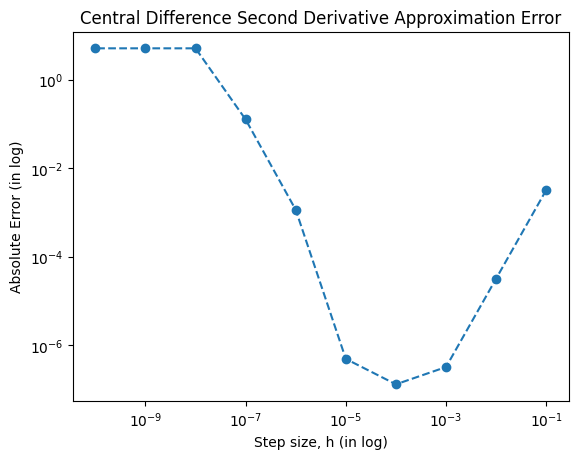

In [ ]:
def f(x):
    return exp(sin(2*x))

def central_difference_second_derivative(f, x, h):
    return 4.0*(f(x+(h/2)) + f(x-(h/2)) - 2*f(x)) / (h**2)

x = 0.5
exact_second_derivative = -4*f(x)*(sin(2*x)-cos(2*x)**2)
hs = [10**(i) for i in range(-1, -11,-1)]
errors = []

print("h\t\tAbsolute Error")
print("-" * 40)

for h in hs:
    approx_second_derivative = central_difference_second_derivative(f, x, h)
    error = abs(exact_second_derivative - approx_second_derivative)
    errors.append(error)
    print(f"{h:.0e}\t{error:.10f}")

plt.figure()
plt.plot(hs, errors, marker='o', linestyle='dashed')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Step size, h (in log)')
plt.ylabel('Absolute Error (in log)')
plt.title('Central Difference Second Derivative Approximation Error')
plt.show()


# **Section 3.6 Problem 8**

(a) Analytically solving the problem:

The given function is $ f(x) = \left( \frac{1 - \cos(x)}{x^2} \right) $

The first differential is,
$$ f^{'}(x) = \frac{d}{dx} \left( \frac{1 - \cos(x)}{x^2} \right) = \frac{x \sin(x) + 2 \cos(x) - 2}{x^3} $$

The second derivative is,
$$  f^{''}(x) = \frac{d^2}{dx^2} \left( \frac{1 - \cos(x)}{x^2} \right) =\frac{d}{dx} \left(\frac{x \sin(x) + 2 \cos(x) - 2}{x^3}\right)=  \frac{(x^2 - 6) \cos(x) - 4x \sin(x) + 6}{x^4} $$


The value of second derivative at $x=0.004$ is $-0.0833594$.

h		Absolute Error
----------------------------------------
1e-01	0.0000332785
1e-02	0.0000262174
1e-03	0.0000437070
1e-04	0.0028156950
1e-05	0.2279282014
1e-06	33.8114907989


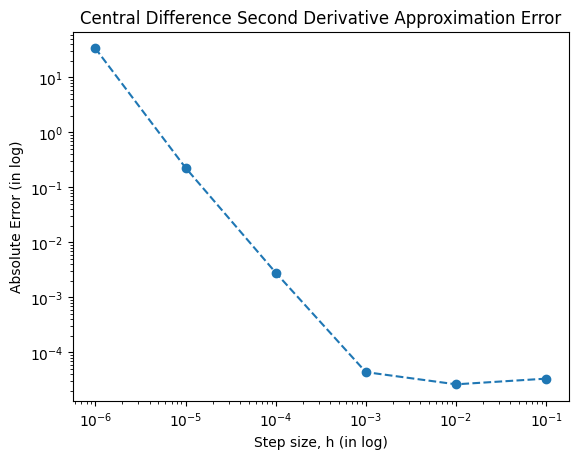

In [ ]:
# (b) Solving it using central difference method
def g(x):
    return (1-cos(x))/(x**2)

def central_difference_second_derivative(f, x, h):
    return 4.0*(f(x+(h/2)) + f(x-(h/2)) - 2*f(x)) / (h**2)

x = 0.004
exact_second_derivative = -0.0833594
hs = [10**(i) for i in range(-1, -7,-1)]
errors = []

print("h\t\tAbsolute Error")
print("-" * 40)

for h in hs:
    approx_second_derivative = central_difference_second_derivative(g, x, h)
    error = abs(exact_second_derivative - approx_second_derivative)
    errors.append(error)
    print(f"{h:.0e}\t{error:.10f}")

plt.figure()
plt.plot(hs, errors, marker='o', linestyle='dashed')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Step size, h (in log)')
plt.ylabel('Absolute Error (in log)')
plt.title('Central Difference Second Derivative Approximation Error')
plt.show()

h		Absolute Error
----------------------------------------
1e-01	0.0000332774
1e-02	0.0000264028
1e-03	0.0000263333
1e-04	0.0000263262
1e-05	0.0000216189
1e-06	0.0010175499


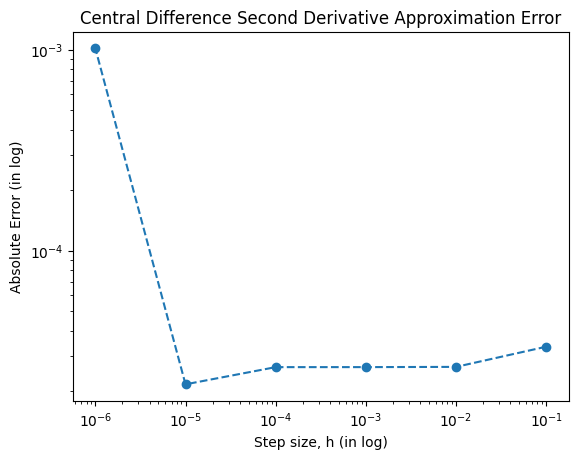

In [ ]:
# (c) Solving it using central-difference method but upon modified f(x)
def mod_g(x):
    # Use modified form of function involving no subtraction obtained using trigonometric manipulations
    return (sin(x)**2)/(x**2*(1+cos(x)))

def central_difference_second_derivative(f, x, h):
    return 4.0*(f(x+(h/2)) + f(x-(h/2)) - 2*f(x)) / (h**2)

x = 0.004
exact_second_derivative = -0.0833594
hs = [10**(i) for i in range(-1, -7,-1)]
errors = []

print("h\t\tAbsolute Error")
print("-" * 40)

for h in hs:
    approx_second_derivative = central_difference_second_derivative(mod_g, x, h)
    error = abs(exact_second_derivative - approx_second_derivative)
    errors.append(error)
    print(f"{h:.0e}\t{error:.10f}")

plt.figure()
plt.plot(hs, errors, marker='o', linestyle='dashed')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Step size, h (in log)')
plt.ylabel('Absolute Error (in log)')
plt.title('Central Difference Second Derivative Approximation Error')
plt.show()

# **Section 3.6 Problem 14**

(a)
Let us begin by writing the Taylor expansion of $f(x-h)$, $f(x-h/2)$, $f(x+h/2)$ and $f(x+h)$. We have:


$$f(x-h) = f(x) -hf^{(1)}(x) + \frac{h^2}{2}f^{(2)}(x)- \frac{h^3}{6}f^{(3)}(x) + \frac{h^4}{24}f^{(4)}(x)- \frac{h^5}{120}f^{(5)}(x) + \mathcal{O}(h^6)$$
$$f\left(x-\frac{h}{2}\right) = f(x) -\frac{h}{2}f^{(1)}(x) + \frac{h^2}{8}f^{(2)}(x)- \frac{h^3}{48}f^{(3)}(x) + \frac{h^4}{384}f^{(4)}(x)- \frac{h^5}{3840}f^{(5)}(x) + \mathcal{O}(h^6)$$
$$f\left(x+\frac{h}{2}\right) = f(x) +\frac{h}{2}f^{(1)}(x) + \frac{h^2}{8}f^{(2)}(x) + \frac{h^3}{48}f^{(3)}(x) + \frac{h^4}{384}f^{(4)}(x) + \frac{h^5}{3840}f^{(5)}(x) + \mathcal{O}(h^6)$$
$$f(x+h) = f(x) + hf^{(1)}(x) + \frac{h^2}{2}f^{(2)}(x) + \frac{h^3}{6}f^{(3)}(x) + \frac{h^4}{24}f^{(4)}(x) + \frac{h^5}{120}f^{(5)}(x) + \mathcal{O}(h^6)$$

Now notice that to remove term of order $\sim h^4$, we will have to multiply $f(x-\frac{h}{2})$ and $f(x+\frac{h}{2})$ with 16 and subtract out by $f(x-h) + f(x+h)$. Upon doing these, we get:


$$ 16\left[f\left(x-\frac{h}{2}\right)+ f\left(x+\frac{h}{2}\right)\right] - \left(f(x-h)+ f(x+h)\right) = 30f(x) + 3h^2f^{(2)}(x) + \mathcal{O}(h^6)$$


This can be further simplified while keeping $f^{(2)}(x)$ on one side of the equation. We thus have, second central-difference formula for second differentiation:


$$f^{(2)}(x) = \frac{16f(x+h/2) + 16f(x-h/2) - 30f(x) - f(x+h) - f(x-h)} {3h^2} + \mathcal{O}(h^4)$$

(b)
Let us now turn our attention towards deriving the result using Richardson's extrapolation method. Extrapolation formula is:


$$ G = \frac{2^p g(h/2) - g(h)}{2^p - 1} + O(h^{p+q}) $$
For second central difference,
$$ g(h/2) = 4\frac{f(x+h/2) + f(x-h/2) - 2f(x)} {h^2} $$
and p = 2.

Thus applying the formula we get

$$ G = \frac{4\times(4\frac{f(x+h/2) + f(x-h/2) - 2f(x)} {h^2})-(4\frac{f(x+h) + f(x-h) - 2f(x)} {4h^2})}{4-1} + \mathcal{O}(h^{2+2}) $$

which simplifies to


$$ f^{(2)}(x) = \frac{16f(x+h/2) + 16f(x-h/2) - 30f(x) - f(x+h) - f(x-h)} {3h^2} + \mathcal{O}(h^4) $$

# **Section 3.6 Problem 15**

$$ f(x) = \frac{(x-5)(x-6)\sqrt{x}}{x-7} + ln(8x) $$
For x=4 \\
Using standard differentiation rules we have to replace $x⟶[x,1] = [4,1]$ and constants $c⟶[c,0]$ \\
$$\sqrt{x} ⟶ \left[\sqrt{x},\frac{1}{2\sqrt{x}}\right] = [2,1/4]$$ and assuming base of logarithm to be 2(simplifies calculation a lot) \\
$$ln(8x) ⟶ \left[ ln(8x), \frac{1}{x} \right] = [ln(8x),1/4] $$

Now,
\begin{align}
(x-5)(x-6)\sqrt{x} &⟶ [-1,1][-2,1][2,\frac{1}{4}] \\
&= [2,-2-1][2,\frac{1}{4}] \\
&= [4,\frac{-11}{2}] \\
\frac{(x-5)(x-6)\sqrt{x}}{x-7} &⟶ \frac{[4,-5.5]}{[-3,1]} \\
&= [-4/3, \frac{\frac{33}{2}-4}{9}] \\
&= [-4/3, \frac{25}{18}]\\
\frac{(x-5)(x-6)\sqrt{x}}{x-7} + ln(8x) &⟶ [-4/3, \frac{25}{18}] + [ln(32),1/4] \\
&= [\frac{-4}{3}+ln(32),\frac{25}{18}+\frac{1}{4}] \\
&= [2.1324, 1.6389]
\end{align}

Hence the value of the function at x=4 is 2.1324 and it's derivative is 1.6389.
